Aluno : Matheus Pinto

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eig



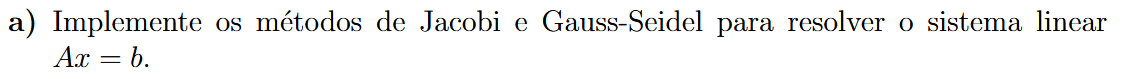


O código implementa duas classes, `Jacobi` e `Gauss_Seidel`, que resolvem sistemas lineares da forma *$Ax = b$* utilizando os métodos iterativos de Jacobi e Gauss-Seidel.

### **Classe Jacobi**
- O método `solve()` resolve *$Ax = b$* iterativamente, atualizando todas as variáveis ao mesmo tempo a cada iteração.
- O critério de parada é a convergência dos valores de *$x$* ou o número máximo de iterações.
- O método `check_convergence()` calcula o raio espectral da matriz de iteração *$M_J$* para verificar se o método converge.

### **Classe Gauss_Seidel**
- O método `solve()` resolve *$Ax = b$*, mas as atualizações das variáveis são feitas de forma sequencial, usando os valores já atualizados.
- A convergência é checada com `check_convergence()`, que calcula o raio espectral da matriz de iteração *$M_{GS}$*.

### **Execução**
- As classes são instanciadas (`j = Jacobi()`, `gs = Gauss_Seidel()`).
- Uma matriz *$A$* é definida como exemplo para os testes.


In [2]:
class Jacobi:
    def __init__(self):
        pass

    def solve(self, A, b, max_iter = 1000):
    # Neste algoritmo pode-se atualizar o vetor x(i+1) simultaneamente, onde o seu próximo valor somente depende dos valores de x(i)
        errors = []
        x = np.zeros_like(b)
        
        for iter in range(max_iter):
            x_new = np.zeros_like(x)
            if iter != 0:
                #print(f"Iteration {iter}: {x}")
                pass

            for i in range(A.shape[0]):
                s1 = np.dot(A[i, :i], x[:i]) # Para as variáveis antes dela
                s2 = np.dot(A[i, i + 1:], x[i + 1:]) # Para as variáveis depois dela
                x_new[i] = (b[i] - s1 - s2) / A[i, i]

            if np.allclose(x, x_new, atol=1e-10, rtol=0.):
                return x, errors
                
            x = x_new.copy()

            errors.append(np.linalg.norm(b - np.dot(A, x)))
        
        print(f"Jacobi stoped after {max_iter} iterations")
        return x, errors # If it does not converge, returns the last x calculated
    

    def check_convergence(self, A):
        U = np.triu(A, k=1)
        L = np.tril(A, k=-1)
        D = A - L - U
        M = -np.linalg.inv(D) @ (L + U)
        spectral_radius = max(abs(eig(M)[0]))
        if spectral_radius < 1:
            return True, spectral_radius
        else:
            return False, spectral_radius


class Gauss_Seidel:
    def __init__(self):
        pass

    def solve(self, A, b, max_iter=1000, tol=1e-10):
    # Neste algoritmo não se pode atualizar o vetor x(i+1) simultaneamente, onde o seu próximo valor depende dos valores de x(i) e de x(i+1)

        errors = []
        x = np.zeros_like(b)

        for iter in range(max_iter):
            x_new = np.zeros_like(x)
            if iter != 0:
                #print(f"Iteration {iter}: {x}")
                pass

            for i in range(A.shape[0]):
                s1 = np.dot(A[i, :i], x_new[:i]) # Para as variáveis antes dela
                s2 = np.dot(A[i, i + 1:], x[i + 1:]) # Para as variáveis depois dela
                x_new[i] = (b[i] - s1 - s2) / A[i, i]

            if np.allclose(x, x_new, atol=tol, rtol=0.):
                return x, errors
                
            x = x_new.copy()
            errors.append(np.linalg.norm(b - np.dot(A, x)))
        
        print(f"Gauss-Seidel stoped after {max_iter} iterations")
        return x, errors # If it does not converge, returns the last x calculated
    

    def check_convergence(self, A):
        U = np.triu(A, k=1)
        L = np.tril(A, k=-1)
        D = A - L - U
        M = -np.linalg.inv(D + L) @ (U)
        spectral_radius = max(abs(eig(M)[0]))
        if spectral_radius < 1:
            return True, spectral_radius
        else:
            return False, spectral_radius


j = Jacobi()
gs = Gauss_Seidel()
A = np.array([[10., -1., 2.],
            [-1., 11., -1.],
            [2., -1., 10.],
            ])

![alt text]({4FD5FB9B-97BF-4AF9-A0AB-12285C6D5742}.png)

A função `exercise_b(A, b)` executa os métodos de Jacobi e Gauss-Seidel para resolver o sistema *$Ax = b$* e plota a evolução do erro (resíduo) ao longo das iterações.

### **Passos do código**
1. Resolve o sistema usando `gs.solve(A, b)` e `j.solve(A, b)`, obtendo as soluções e os erros ao longo das iterações.
2. Plota os resíduos (`ej` para Jacobi e `egs` para Gauss-Seidel) em escala logarítmica no eixo *$y$*.
3. Exibe o gráfico comparando os dois métodos.

### **Resultados**
- O método Gauss-Seidel converge mais rápido que Jacobi para ambas as matrizes testadas.
- Isso confirma a maior eficiência de Gauss-Seidel na redução do erro a cada iteração.


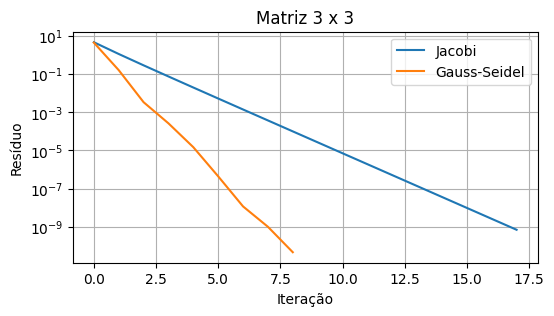

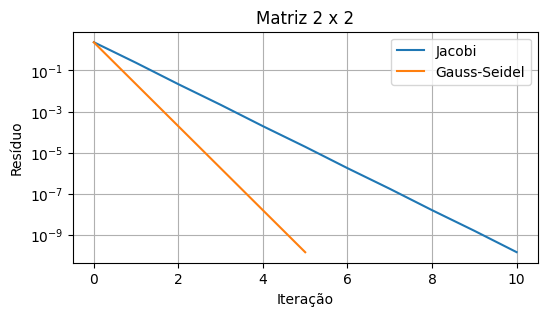

In [93]:
def exercise_b(A, b):
    sgs, egs = gs.solve(A,b)
    sj, ej = j.solve(A,b)

    plt.figure(figsize=(6,3))
    plt.plot(ej, label='Jacobi')
    plt.plot(egs, label='Gauss-Seidel')
    plt.yscale('log')
    plt.xlabel('Iteração')
    plt.ylabel('Resíduo')
    plt.legend()
    plt.grid()
    plt.title(f"Matriz {A.shape[0]} x {A.shape[0]}")
    plt.show()


A = np.array([[10., -1., 2.],
            [-1., 11., -1.],
            [2., -1., 10.],
            ])
b = np.array([6., 25., -11.])
exercise_b(A,b)


A = np.array([[10., -1.],
            [-1., 11.],
            ])
b = np.array([6., 25.])
exercise_b(A,b)

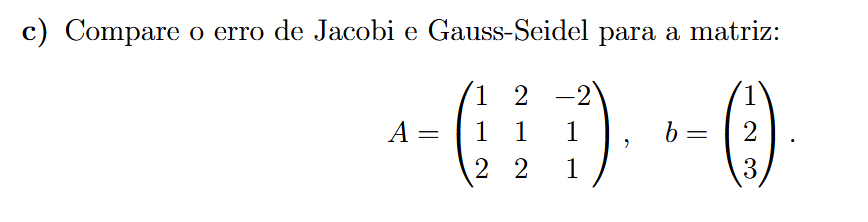

Neste exemplo, o sistema linear fornecido é:

$
\mathbf{A} = \begin{bmatrix}
1 & 2 & -2 \\
1 & 1 & 1 \\
2 & 2 & 1
\end{bmatrix}
\quad \text{e} \quad
b = \begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}
$

### **Observações:**
- O código resolve o sistema utilizando os métodos de Gauss-Seidel e Jacobi, com um número máximo de iterações de 1000.
- O erro final de Gauss-Seidel não converge após o número máximo de iterações, ou seja, o método não encontra uma solução dentro do limite de iterações.
- O método de Jacobi, por outro lado, encontra a solução em apenas 3 iterações, o que mostra que ele convergiu muito mais rapidamente neste caso específico.

### **Resultados Observados:**
- **Gauss-Seidel final error**: O erro final de Gauss-Seidel é elevado, indicando que o método não convergiu.
- **Jacobi final error**: O erro final de Jacobi é muito menor, mostrando que ele convergiu rapidamente.

### **Explicação Proposta:**
A convergência dos métodos de `Jacobi` e `Gauss-Seidel` está diretamente relacionada ao valor do raio espectral de cada matriz $\mathbf{M}$, caso $\rho\mathbf(M)$ > 1, o método irá divergir.
A matriz $\mathbf{M}$ é definida diferente para cada um dos métodos:

- Para o **método de Jacobi**, temos: 
    - $ \mathbf{M_J = -D^{-1}(L + U)} $, 
    - $\rho\mathbf(M_J) = 1.081e-05$

  onde *$\mathbf{D}$* é a matriz diagonal de *$\mathbf{A}$*, e *$\mathbf{L}$* e *$\mathbf{U}$* são, respectivamente, as partes inferior e superior de *$\mathbf{A}$*..

- Para o **método de Gauss-Seidel**, temos:
    - $ \mathbf{M_{GS} = -(D + L)^{-1} U}$,
    - $\rho\mathbf(M_{GS}) = 2$


### **Conclusão:**
Neste exemplo, a escolha do método de Jacobi foi mais eficaz para este sistema específico, já que Gauss-Seidel não convergiu no número de iterações permitido.


1.0812771377650137e-05
2.0
Gauss-Seidel stoped after 1000 iterations

Gauss-Seidel final error: inf
Jacobi final error: 0.0
Gauss-Seidel stoped after 1000 iterations


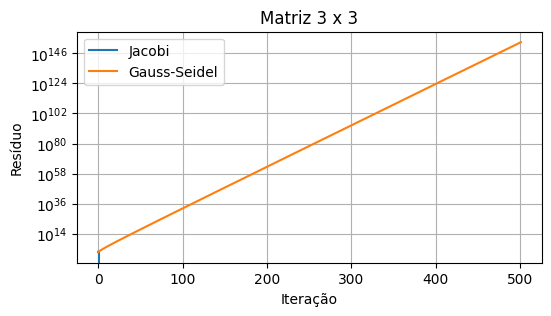

In [94]:
A = np.array([
    [1.,2.,-2.],
    [1.,1.,1.],
    [2.,2.,1.]
])
b = np.array([1.,2.,3.])

print(j.check_convergence(A)[1])
print(gs.check_convergence(A)[1])

sgs, egs = gs.solve(A,b, max_iter=1000)
sj, ej = j.solve(A,b)
print(f"\nGauss-Seidel final error: {egs[-1]}\nJacobi final error: {ej[-1]}")
exercise_b(A, b)



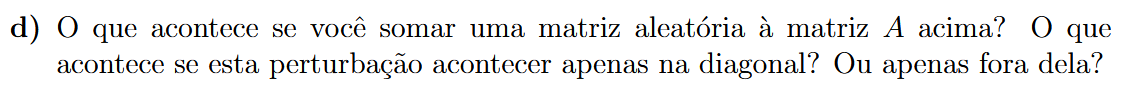

# **Análise da Convergência dos Métodos Jacobi e Gauss-Seidel**

Sabendo que para o método de `jacobi` o algoritmo converge e o oposto ocorre para o método de `Gauss-Seidel`, iremos realizar uma análise. Percebe-se que a convergência pode ser alterada quando se soma uma matriz aleatória (com todas as entradas positivas e entre 0 e 1) à matriz $\mathbf{A}$. Para essa análise, foi utilizada a função check_convergence() implementada nas classes Jacobi e Gauss_Seidel e também um conjunto de 300000 matrizes aleatórias.

#### Casos propostos:

1. **Perturbação em toda a matriz:** Alteração em todos os elementos de $\mathbf{A}$.
2. **Perturbação somente na diagonal:** Modificação restrita aos elementos da diagonal principal.
3. **Perturbação em tudo menos na diagonal:** Alteração em todos os elementos, exceto na diagonal.

#### **Resultados Observados:**

- **Maior impacto na diagonal:** Somar valores à diagonal é o cenário que mais afeta a convergência da matriz $\mathbf{A}$. Isso sugere que a estabilidade dos métodos depende fortemente das propriedades da diagonal.

- **Diferença entre os métodos:** A `Jacobiana` se mostra muito mais suscetível a passar a ser divergente devido às pertubações em $\mathbf{A}$, em comparação com o método de `Gauss-Seidel` passar a ser convergente:

  - **Somar em tudo:**

    - `Jacobi`: Em **94.40%** dos casos o método passou a divergir.

    - `Gauss_Seidel`: Em **0.30%** dos casos o método passou a convergir. 
  
  - **Somar somente na diagonal:**
    - `Jacobi`: Em **2.91%** dos casos ele passou a divergir.

    - `Gauss-Seidel`: Em **26.51%** dos casos o método passou a convergir

  - **Somar fora da diagonal:** 

    - `Jacobi`: Em **72.78%** dos casos ele passou a divergir.

    - `Gauss-Seidel`: A divergência do método não sofre alterações devido à perturbações fora da diagonal (**0.0%** passaram a ser convergente).
  
 

#### **Explicação Proposta:**

A convergência dos métodos Jacobi e Gauss-Seidel está diretamente ligada ao raio espectral da matriz de iteração $\mathbf{M}$. Para que um desses métodos converja, pe necessário que o raio espectral de $\mathbf{M}$ seja menor que 1, ou seja, que a norma espectral de M satisfaça:
$\rho\mathbf(M)$ < 1

A matriz $\mathbf{M}$ é definida diferente para cada um dos métodos:

- Para o **método de Jacobi**, temos:

  $ M_J = -D^{-1}(L + U) $

  onde *D* é a matriz diagonal de *A*, e *L* e *U* são, respectivamente, as partes inferior e superior de *A*. Como a inversa de *D* aparece explicitamente, uma pertubação na diagonal principal terá baixa probabilidade de alterar a convergência do método, enquanto que alterações na *L* e *U* tendem a comprometer seriamente o seu raio espectral.

- Para o **método de Gauss-Seidel**, temos:

  $ M_{GS} = -(D + L)^{-1} U$ 

  Aqui, a matriz $(D + L)^{-1}$ é utilizada na iteração, e como inclui tanto *D* quanto *L*, as perturbações na diagonal têm efeito, mas perturbações fora da diagonal têm impacto menor. Isso explica por que Gauss-Seidel é menos sensível a alterações fora da diagonal, pois o próprio método já atualiza iterativamente os valores com base nos novos cálculos durante cada passo.


### **Conclusão**

A sensibilidade do método de Jacobi às perturbações decorre do fato de que ele depende exclusivamente da matriz *$D^{-1}(L+U)$*, o que significa que qualquer alteração na diagonal principal impacta diretamente a iteração. Por outro lado, Gauss-Seidel atenua parte desse impacto ao utilizar informações atualizadas na iteração, tornando-o mais estável em alguns cenários.

Com isso, concluímos que a convergência dos métodos iterativos está fortemente ligada à estrutura da matriz *A* e às alterações em sua diagonal, justificando a maior robustez do método de Gauss-Seidel em relação a perturbações fora da diagonal.






Jacobi Passou a divergir:
 somar em tudo: 94.39866666666667%
 somar somente na diagonal: 2.851%
 somar somente fora da diagonal: 99.80066666666667%
 
Gauss-Seidel Passou a convergir: 
 somar em tudo: 0.2806666666666667%
 somar somente na diagonal: 26.637666666666664%
 somar somente fora da diagonal: 0.0%
 


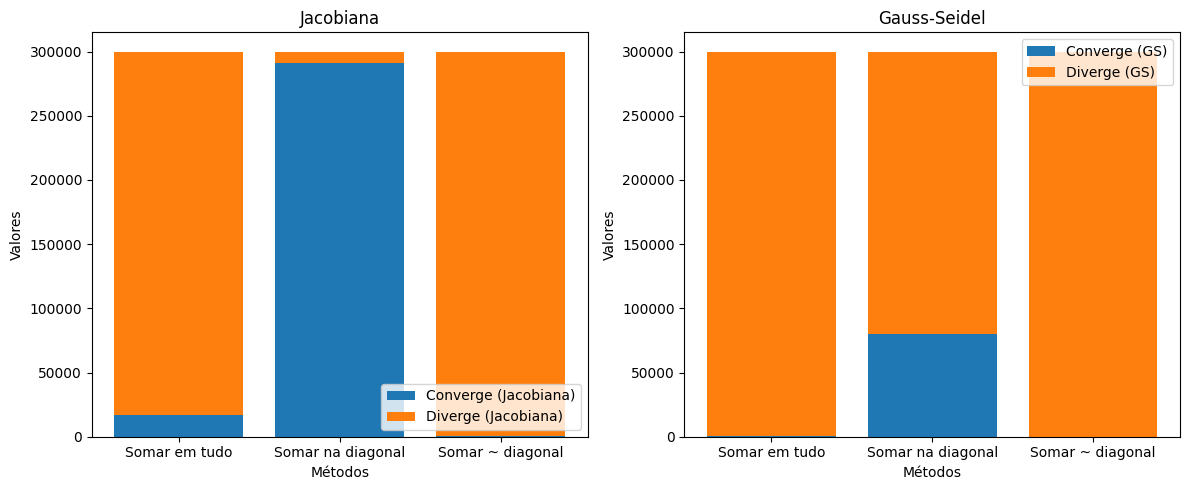

In [95]:
def exercise_c(A, num_iterations=1000, pertubation_impact=1):
    histListJ_converges = [0, 0, 0]
    histListJ_diverges = [0, 0, 0]
    histListGS_converges = [0, 0, 0]        
    histListGS_diverges = [0, 0, 0]        
    for i in range(num_iterations):
        C = np.random.random(3 * 3).reshape(3,3) * pertubation_impact
        U = np.triu(C, k=1)
        L = np.tril(C, k=-1)
        D = C - L - U

        A1 = A + U + D + L
        A2 = A + D
        A3 = A + U + L

        # if the A1 converges, then add one to the histList[0]
        if (gs.check_convergence(A1)[0]):
            histListGS_converges[0] += 1
        else:
            histListGS_diverges[0] += 1
        
        if (j.check_convergence(A1)[0]):
            histListJ_converges[0] += 1
        else:
            histListJ_diverges[0] += 1
            
        # if the A2 converges, then add one to the histList[1]
        if (gs.check_convergence(A2)[0]):
            histListGS_converges[1] += 1
        else:
            histListGS_diverges[1] += 1
        
        if (j.check_convergence(A2)[0]):
            histListJ_converges[1] += 1
        else:
            histListJ_diverges[1] += 1
        
        # if the A3 converges, then add one to the histList[2]
        if (gs.check_convergence(A3)[0]):
            histListGS_converges[2] += 1
        else:
            histListGS_diverges[2] += 1
        
        if (j.check_convergence(A3)[0]):
            histListJ_converges[2] += 1
        else:
            histListJ_diverges[2] += 1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Definir as categorias
    categorias = ['Somar em tudo', 'Somar na diagonal', 'Somar ~ diagonal']

    # Gráfico 1: Empilhar ax1 (converges) e ax3 (diverges) - Jacobiana
    ax1.bar(categorias, histListJ_converges, label='Converge (Jacobiana)')
    ax1.bar(categorias, histListJ_diverges, bottom=histListJ_converges, label='Diverge (Jacobiana)')
    ax1.legend()
    ax1.set_title('Jacobiana')
    ax1.set_xlabel('Métodos')
    ax1.set_ylabel('Valores')

    # Gráfico 2: Empilhar ax2 (converges) e ax4 (diverges) - Gauss-Seidel
    ax2.bar(categorias, histListGS_converges, label='Converge (GS)')
    ax2.bar(categorias, histListGS_diverges, bottom=histListGS_converges, label='Diverge (GS)')
    ax2.legend()
    ax2.set_title('Gauss-Seidel')
    ax2.set_xlabel('Métodos')
    ax2.set_ylabel('Valores')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    gauss_seidel_converges = np.array(histListGS_converges)/num_iterations * 100
    jacobi_diverges = np.array(histListJ_diverges)/num_iterations * 100

    print(f"Jacobi Passou a divergir:\n somar em tudo: {jacobi_diverges[0]}%\n somar somente na diagonal: {jacobi_diverges[1]}%\n somar somente fora da diagonal: {jacobi_diverges[2]}%\n ")
    print(f"Gauss-Seidel Passou a convergir: \n somar em tudo: {gauss_seidel_converges[0]}%\n somar somente na diagonal: {gauss_seidel_converges[1]}%\n somar somente fora da diagonal: {gauss_seidel_converges[2]}%\n ")

    # Exibir os gráficos
    plt.show()


exercise_c(A, num_iterations=300000)




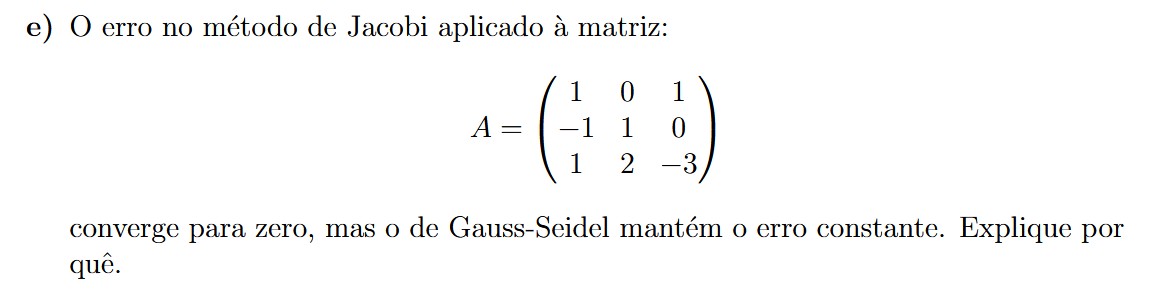

Ambos os métodos são iterativos, mas o Gauss-Seidel mostra um comportamento peculiar ao oscilar entre dois vetores de "resposta" $x$.

A solução é calculada para um número máximo de iterações (`max_iter=100`) e o erro final de cada método é impresso. O gráfico gerado mostra a evolução do erro ao longo das iterações para os dois métodos.

### **Observações sobre os vetores de resposta $x$ para o *método Gauss-Seidel*:**

| Iteração | 0 | 1 | 2 | 3 |
|----------|----------|----------|----------|----------|
| x1   | 0   |  $$b_1$$   | $$ \frac{b_3-2b_2}{3} $$   | $$ b_1 $$ |
| x2   | 0   | $$ b_1 + b_2 $$  | $$ \frac{b_2 + b_3}{3} $$   | $$ b_1 + b_2 $$ |
| x3   | 0   | $$ \frac{3b_1 + 2b_2 - b_3}{3} $$ |  $$0$$   | $$ \frac{3b_1 + 2b_2 - b_3}{3} $$ |

- Para o **método de Jacobi**, temos: 
    - $\rho\mathbf(M_J) = 0.9444$
- Para o **método de Gauss-Seidel**, temos:
    - $\rho\mathbf(M_{GS}) = 1$

### **Explicação Proposta:**
Como o raio espectral de $\mathbf{M_{GS}}$ é igual a 1, então temos que o vetor resposta $\mathbf{x}$ ficará oscilando entre os dois valores mostrados na observação.

### **Conclusão Proposta:**
Apesar do método de `Gauss-Seidel` convergir mais rápido em muitos casos, neste temos que o seu raio espectral terá valor unitário, logo, utilizar o método de `Jacobi` é recomendado.

Jacobi: (True, np.float64(0.9444378697709918))
Gauss-Seidel: (False, np.float64(1.0))
Gauss-Seidel stoped after 300 iterations
Jacobi stoped after 300 iterations

Gauss-Seidel final error: 1.3333333333333333
Jacobi final error: 6.363512926566191e-08


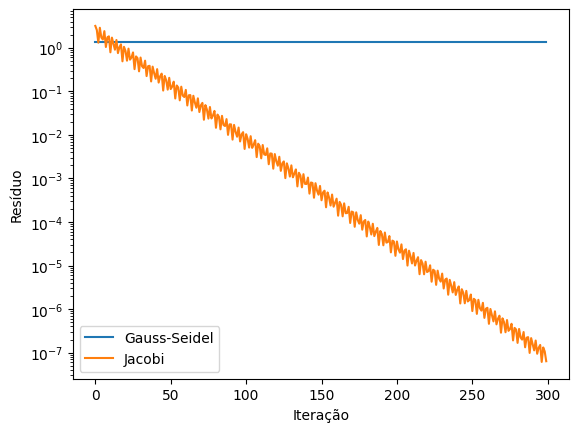

In [96]:
alpha = 1
beta = 1

A = np.array([
    [1.*beta,0.,1.*alpha],
    [-1.,1.*beta,0.],
    [1.,2.,-3.*beta]
])
b = np.array([1.,1.,1.])

print(f"Jacobi: {j.check_convergence(A)}")
print(f"Gauss-Seidel: {gs.check_convergence(A)}")
sgs, egs = gs.solve(A,b, max_iter=300)
sj, ej = j.solve(A,b, max_iter=300)
print(f"\nGauss-Seidel final error: {egs[-1]}\nJacobi final error: {ej[-1]}")
plt.plot(egs,label='Gauss-Seidel')
plt.plot(ej,label='Jacobi')
plt.xlabel("Iteração")
plt.ylabel("Resíduo")
plt.yscale('log')
plt.legend()
plt.show()




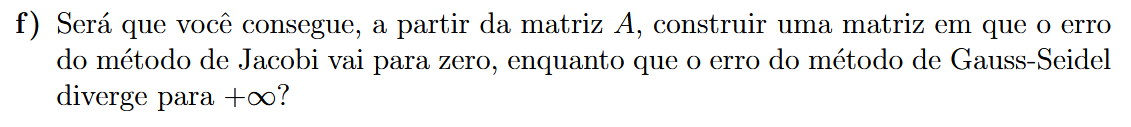

# Por que a modificação `A = 10A + U` faz com que Jacobi convirja e Gauss-Seidel divirja?

A modificação  $\mathbf{A = 10A + U}$ onde $\mathbf{U}$ é a parte triangular superior de $\mathbf{A}$, faz com que o **método de Jacobi** convirja e o **método de Gauss-Seidel** divirja para o infinito por conta da relação entre a norma de  $\mathbf{D^{-1} L}$  e  $\mathbf{D^{-1} U}$ , que afetam a convergência de cada método.  

## Analisando o efeito de aumentarmos a D na matriz $M_{J}$:
   - $\rho(M_{J}) = \rho(D^{-1}(U+L))$
   - $D' = \beta D$
   - $\rho(M_{J}') = \frac{1}{\beta}\rho(M_{J})$
   - Ou seja, **aumentar a diagonal** faz com que tenhamos um **menor raio espectral**

## Analisando o efeito de aumentarmos a U e a D na matriz $M_{GS}$:
   - $\rho(M_{GS}) = \rho(D^{-1}(U+L))$
   -  $U' = \alpha U$
   -  $\rho(M_{GS}') = \alpha\rho(M_{J})$
   - Ou seja, **aumentar a U** faz com que tenhamos um **maior raio espectral**
   - Para modificar a D nesta matriz e calcular o valor do raio espectral em função de $\beta$, podemos realizar as contas manuais do raio espectral da matriz, chegando em $\rho(M_{GS}) = \frac{\beta + 2}{3 \beta^3}$.
   - Ou seja, **aumentar a diagonal** faz com que o raio espectral **diminua**.
   - Juntando as duas informações, temos que $\rho(M_{GS}) = \frac{\alpha(\beta + 2)}{3 \beta^3}$.
   
 

## Efeito da Transformação `A = 10A + U`

Agora, vamos analisar como essa modificação afeta as normas de $ M_J $ e $ M_{GS} $.

1. **Multiplicar $ A $ por 10**:  
   - Isso faz com que os elementos de $ D $, $ L $ e $ U $ aumentem 10 vezes.
   - O impacto é que $ D $ se torna muito maior em relação a $ L + U $, o que **reduz a norma de $ D^{-1} (L + U) $**, favorecendo a convergência de Jacobi.

2. **Adicionar $ U $ a $ A $**:  
   - Isso **aumenta os valores da matriz triangular superior**.
   - Como $ M_{GS} = (D + L)^{-1} U $, um $ U $ maior faz com que a norma de $ M_{GS} $ aumente, tornando possível que $ \rho(M_{GS}) \geq 1 $, levando à divergência.

## Resumo

- **Jacobi convirge** porque $ D^{-1} (L + U) $ tem norma menor que 1 devido ao aumento da diagonal.
- **Gauss-Seidel diverge** porque $ (D + L)^{-1} U $ tem norma maior que 1 devido ao aumento da parte superior $ U $.

Essa modificação "desbalanceia" a decomposição de $ A $ de forma que Jacobi fique mais estável, enquanto Gauss-Seidel perde estabilidade e diverge. 


Jacobi: (True, np.float64(0.9775431169216137))
Gauss-Seidel: (False, np.float64(1.1))
Gauss-Seidel stoped after 1000 iterations

Gauss-Seidel final error: 3.2932438906744334e+41
Jacobi final error: 2.5641119533862052e-09


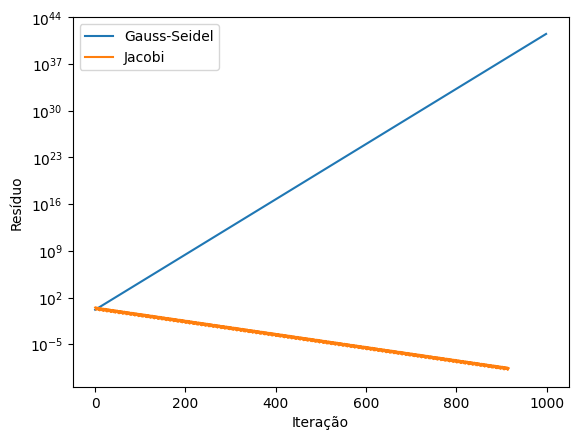

In [ ]:
"""
A = np.array([
    [1.,0.,1.],
    [-1.,1.,0.],
    [1.,2.,-3.]
])
    
exercise_c(A, num_iterations=100, pertubation_impact=10)

for i in range(100):

    A2 = A + U + L

    if (j.check_convergence(A2) and not gs.check_convergence(A2)):
            print("achou")
"""    
A = np.array([
    [1.,0.,1.],
    [-1.,1.,0.],
    [1.,2.,-3.]
])
b = np.array([1.,1.,1.])
U = np.triu(A, k=1)
L = np.tril(A, k=-1)
print(L)
D = A - L - U

A = 11*U + 10*D + 10*L
#A = 40 * A.T @ A.T - 8500 * A 

print(f"Jacobi: {j.check_convergence(A)}")
print(f"Gauss-Seidel: {gs.check_convergence(A)}")
sgs, egs = gs.solve(A,b, max_iter=1000)
sj, ej = j.solve(A,b, max_iter=1000)
print(f"\nGauss-Seidel final error: {egs[-1]}\nJacobi final error: {ej[-1]}")
plt.plot(egs,label='Gauss-Seidel')
plt.plot(ej,label='Jacobi')
plt.xlabel("Iteração")
plt.yscale('log')
plt.ylabel("Resíduo")
plt.legend()
plt.show()
